# Palmer Penguins

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

This notebook contains my analysis of the famous palmer penguins dataset.

The artwork is by Allison Horst & this dataset is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/).

## Import Pandas

***

To analyse this data, I have used the Pandas Python package. This package allowed me to import the data from CSV and other data types in this Jupyter notebook. With this package, it is also possible to apply the DataFrame that I will use to analyse the presentation of each variable and to make comparisons between them.

In [343]:
# data frames.
import pandas as pd

## Load the Data

***

Firstly I loaded the Palmer Penguins dataset from a URL. 

The URL that I used is [penguins.csv](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv).

This was from the Seaborn Data repository on Github 


In [344]:
# load the penguins data set.

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Now that I have loaded that data, I can inspect it. 

In [345]:
# Lets have a look

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


![Penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png) Photo by [Gabriel Mednick](https://www.gabemednick.com/post/penguin/)

## Inspect The Data

In [346]:
# look at first row

df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [347]:
# Count the sex of penguins

df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [348]:
# Count the number of penguins of each sex
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

## Overview of the Dataset

To have an overview of this dataset, I used [df.describe()](https://www.w3schools.com/python/pandas/ref_df_describe.asp), this is a method in pandas that generates descriptive statistics of the DataFrame. 

It provides summary statistics such as count, mean, standard deviation, minimum, the percentage of the values that are around 25%, 50%, 75% & the maximum value.

In [349]:
# describe the data set

df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


This dataset seems to comprise biometric measurements of penguins, each entry featuring various attributes:

- Species: Identifies the penguin's species (Adelie, Chinstrap, or Gentoo).
- Island: Specifies the location where the penguin was sighted (Torgersen, Biscoe, or Dream).
- Bill Length (mm): Represents the length of the penguin's bill in millimeters.
- Bill Depth (mm): Denotes the depth of the penguin's bill in millimeters.
- Flipper Length (mm): Indicates the length of the penguin's flipper in millimeters.
- Body Mass (g): Specifies the body mass of the penguin in grams.
- Sex: Indicates the gender of the penguin (MALE or FEMALE).


## Model The Variables In The Dataset

***

Pandas has the capability to represent variabls in an appealing manner. Though it is essential to inspect the types of each variable using [df.types](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html#). This step is very important as it will dictate the approach needed to visualize the data.

In [350]:
# Inspect types.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In this dataset, we only have two types of variables, [Objects](https://realpython.com/python-variables/#object-references) and [Floats](https://realpython.com/python-numbers/#floating-point-numbers)

To visualize each variable effectively, Pandas offers various plot types such as bar charts, histograms, and scatter plots. Variables categorized as objects, such as species, island, and sex, are best represented using bar charts due to their limited variations. For instance, the 'species' variable has only three distinct values: Adelie, Gentoo, and Chinstrap, making it suitable for a bar chart as the exact counts of each species can be displayed. However, attempting to plot float-type variables using bar charts can result in a cluttered and disorganized visualization because each sample may have a different value. In such cases, histograms are more appropriate as they provide a distribution estimate for each column, allowing for a clearer representation of the data.

## Bar Chart of Species

***

To be able to present this information in a Bar Chart I will need import both [Numpy](https://realpython.com/tutorials/numpy/) & [Matplotlib](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas) to be able to import the arrays and visualize the variables

In [351]:
import numpy as np

In [352]:
import matplotlib.pyplot as plt

Next thing I did was to check each answer inside the species and get the counts of each of the, I will use [np.unique](https://numpy.org/doc/stable/reference/generated/numpy.unique.html). 
This will identify and return the unique elements present in an array or a list, sorted in ascending order.

In [353]:
# Get the counts.
species = df["species"]
values, counts = np.unique(species, return_counts=True)

In [354]:
# Show.
values, counts

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([152,  68, 124], dtype=int64))

Now that we have stored the arrays using NumPy, we can utilize Matplotlib to create plots from these arrays. To generate a bar chart, we employ the [plt.bar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) function.

<BarContainer object of 3 artists>

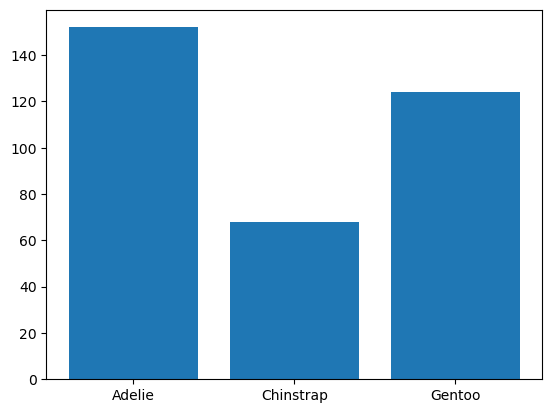

In [355]:
# Plot the bar chart
plt.bar(values, counts)

## Histogram

***

Next thing I need to do is to create a histogram of an appropriate variable in the data set. For this I need to use variables that are floats such as bill_length_mm', bill_depth_mm, flipper_length_mm and body_mass_g. Finally, to be able to plot this Histogram I will need to use Numpy & Matplotlib.

In [356]:
# Firstly I need to get the counts.
flipper_length_mm = df["flipper_length_mm"]
values, counts = np.unique(flipper_length_mm, return_counts=True)

In [357]:
# Show Counts
values, counts

(array([172., 174., 176., 178., 179., 180., 181., 182., 183., 184., 185.,
        186., 187., 188., 189., 190., 191., 192., 193., 194., 195., 196.,
        197., 198., 199., 200., 201., 202., 203., 205., 206., 207., 208.,
        209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
        220., 221., 222., 223., 224., 225., 226., 228., 229., 230., 231.,
         nan]),
 array([ 1,  1,  1,  4,  1,  5,  7,  3,  2,  7,  9,  7, 16,  6,  7, 22, 13,
         7, 15,  5, 17, 10, 10,  8,  6,  4,  6,  4,  5,  3,  1,  2,  8,  5,
        14,  2,  7,  6,  6, 12,  8,  6,  5,  5,  8,  5,  6,  2,  3,  4,  1,
         4,  2,  7,  1,  2], dtype=int64))

Now that I have all of the information necessary for the histogram, I will proceed to plot it.

(array([ 3., 22., 52., 79., 44., 15., 42., 42., 28., 15.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

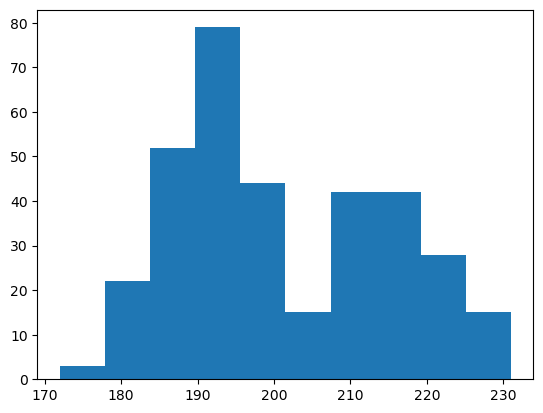

In [358]:
# Plot histogram.
plt.hist(flipper_length_mm,)  

I have plotted the histogram but as there are no line edges it does not look very aesthetically pleasing. To amend this I will add an [edgecolour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to the histogram.

(array([ 3., 22., 52., 79., 44., 15., 42., 42., 28., 15.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

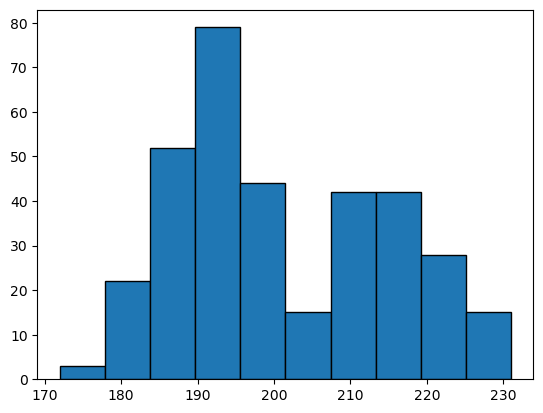

In [359]:
# Add edgecolour to histogram.
plt.hist(flipper_length_mm, edgecolor = "black")


This now gives the histogram a much cleaner look and makes it easier to comprehend the data being put forward in the histogram

## Correlation Analysis

The two variables that I will ananyse are bill_length_mm & bill_depth_mm and I will inspect to see how correlated they are
I will analyse this using the a [Best Fit Line]() [Pearson correlation coefficient](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

Firstly I will need to store the arrays using Numpy


In [360]:
# number of arrays for bill length
blen = df["bill_length_mm"].to_numpy()

# Show.
flen

array([181., 186., 195.,  nan, 193., 190., 181., 195., 193., 190., 186.,
       180., 182., 191., 198., 185., 195., 197., 184., 194., 174., 180.,
       189., 185., 180., 187., 183., 187., 172., 180., 178., 178., 188.,
       184., 195., 196., 190., 180., 181., 184., 182., 195., 186., 196.,
       185., 190., 182., 179., 190., 191., 186., 188., 190., 200., 187.,
       191., 186., 193., 181., 194., 185., 195., 185., 192., 184., 192.,
       195., 188., 190., 198., 190., 190., 196., 197., 190., 195., 191.,
       184., 187., 195., 189., 196., 187., 193., 191., 194., 190., 189.,
       189., 190., 202., 205., 185., 186., 187., 208., 190., 196., 178.,
       192., 192., 203., 183., 190., 193., 184., 199., 190., 181., 197.,
       198., 191., 193., 197., 191., 196., 188., 199., 189., 189., 187.,
       198., 176., 202., 186., 199., 191., 195., 191., 210., 190., 197.,
       193., 199., 187., 190., 191., 200., 185., 193., 193., 187., 188.,
       190., 192., 185., 190., 184., 195., 193., 18

In [361]:
# number of arrays for bill depth
bdep = df["bill_depth_mm"].to_numpy()

# Show.
bdep

array([18.7, 17.4, 18. ,  nan, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 17.8, 19. , 20.7, 18.4, 21.5, 18.3, 18.7,
       19.2, 18.1, 17.2, 18.9, 18.6, 17.9, 18.6, 18.9, 16.7, 18.1, 17.8,
       18.9, 17. , 21.1, 20. , 18.5, 19.3, 19.1, 18. , 18.4, 18.5, 19.7,
       16.9, 18.8, 19. , 18.9, 17.9, 21.2, 17.7, 18.9, 17.9, 19.5, 18.1,
       18.6, 17.5, 18.8, 16.6, 19.1, 16.9, 21.1, 17. , 18.2, 17.1, 18. ,
       16.2, 19.1, 16.6, 19.4, 19. , 18.4, 17.2, 18.9, 17.5, 18.5, 16.8,
       19.4, 16.1, 19.1, 17.2, 17.6, 18.8, 19.4, 17.8, 20.3, 19.5, 18.6,
       19.2, 18.8, 18. , 18.1, 17.1, 18.1, 17.3, 18.9, 18.6, 18.5, 16.1,
       18.5, 17.9, 20. , 16. , 20. , 18.6, 18.9, 17.2, 20. , 17. , 19. ,
       16.5, 20.3, 17.7, 19.5, 20.7, 18.3, 17. , 20.5, 17. , 18.6, 17.2,
       19.8, 17. , 18.5, 15.9, 19. , 17.6, 18.3, 17.1, 18. , 17.9, 19.2,
       18.5, 18.5, 17.6, 17.5, 17.5, 20.1, 16.5, 17.9, 17.1, 17.2, 15.5,
       17. , 16.8, 18.7, 18.6, 18.4, 17.8, 18.1, 17

(20.0, 75.0)

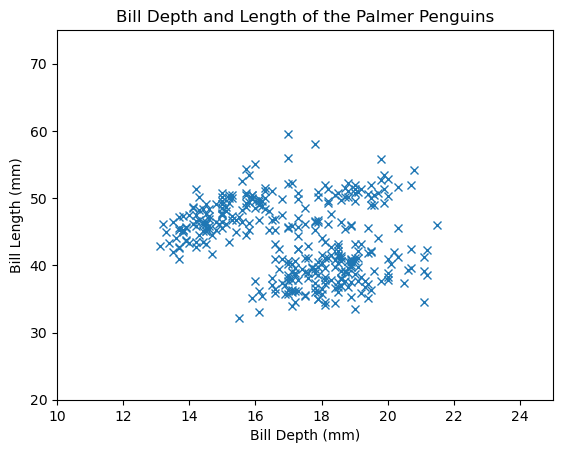

In [362]:
# Generate a fresh figure and a set of axes. 
fig, ax = plt.subplots()

# Simple plot.
ax.plot(bdep, blen, "x") # x is to plot values as x.

# Axis labels.
ax.set_xlabel("Bill Depth (mm)")
ax.set_ylabel("Bill Length (mm)")

# Title.
ax.set_title("Bill Depth and Length of the Palmer Penguins")

# X limits.
ax.set_xlim(10,25)

# Y limits.
ax.set_ylim(20, 75)

I need to be able to calculate slope (m) & the intercept (c) for the best fit line to accurately represent the relationship between the variables Bill Depth & Bill Length. The slope of the line reflects how much the dependent variable changes for each unit change in the independent variable, while the intercept signifies the value of the dependent variable when the independent variable is zero. This line provides insights into the overall trend and helps in making predictions or in understanding the relationship between the variables.


In [363]:
# Calculate m and c.
val = np.isfinite(bdep)
val2 = np.isfinite(blen)
m, c = np.polyfit(bdep[val], blen[val2], 1)

# Show m and c.
m, c

(-0.6498355630183165, 55.0673697719197)

Getting the x and y values for the best fit line allows you to visualise the relationship between two variables in your data and determine the line that best represents that relationship. This line provides insights into the trend or pattern present in your data and can be used for prediction or further analysis.

In [364]:
# Getting the x & y values for the best fit line

# Get the x values
bf_x = np.linspace(10, 25)

# Get the y values
bf_y = m * bf_x + c


(20.0, 75.0)

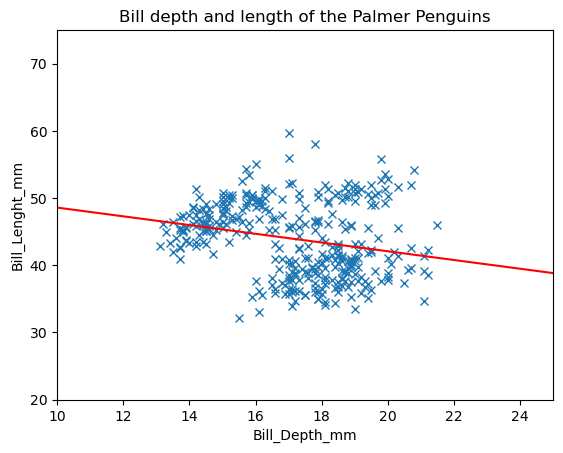

In [365]:
# Create a new figure and set of axes. 
fig, ax = plt.subplots()

# Simple plot.
ax.plot(bdep, blen, "x")

# Plot a straight line using the equation y = mx + c, where the values of m and c have been previously calculated.
ax.plot(bf_x, bf_y, color="red", linestyle="-") 

# Axis labels.
ax.set_xlabel("Bill_Depth_mm")
ax.set_ylabel("Bill_Lenght_mm")

# Title.
ax.set_title("Bill depth and length of the Palmer Penguins")

# X limits.
ax.set_xlim(10, 25)

# Y limits.
ax.set_ylim(20, 75)

## Pearson Correlation Coefficients

The [Pearson correlation coefficient](https://realpython.com/numpy-scipy-pandas-correlation-python/#pearson-correlation-coefficient) is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations. It’s often denoted with the letter r and called Pearson’s r. You can express this value mathematically with this equation:

r = Σᵢ((xᵢ − mean(x))(yᵢ − mean(y))) (√Σᵢ(xᵢ − mean(x))² √Σᵢ(yᵢ − mean(y))²)⁻¹

NumPy has many statistics routines, including [np.corrcoef()](https://realpython.com/numpy-scipy-pandas-correlation-python/), that return a matrix of Pearson correlation coefficients

In [366]:
# Measure the correlation.
np.corrcoef(bdep[val], blen[val2])

array([[ 1.        , -0.23505287],
       [-0.23505287,  1.        ]])

This correlation matrix represents the Pearson correlation coefficients between two pairs of variables. Each value in the matrix represents the correlation coefficient between the corresponding pair of variables.

The value at position (0, 0) is 1. This indicates the correlation coefficient between the first variable and itself, which is always 1. This is expected, as a variable is perfectly correlated with itself.
The value at position (1, 1) is also 1. Similarly, this represents the correlation coefficient between the second variable and itself, which is always 1. Again, this is expected.
The values at positions (0, 1) and (1, 0) are approximately -0.23505287. This indicates the correlation coefficient between the first and second variables.
The negative sign indicates a negative correlation between the two variables.
The magnitude (absolute value) of approximately 0.23505287 suggests a weak negative linear relationship between the two variables. This means that as one variable increases, the other tends to decrease slightly, but the relationship is not strong.
In summary, based on the provided Pearson correlation coefficients:

Both variables are perfectly positively correlated with themselves, which is expected.
There is a weak negative correlation between the two variables, suggesting a slight tendency for one variable to decrease as the other variable increases, but the relationship is not strong.

*** 

## End